In [2]:
#importing all the required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Data Preparation:

In [3]:
# to display all coulmns of a dataframe
#pd.set_option('display.max_column', None)

# to display all rows of a dataframe

#pd.set_option('display.max_rows', None)

# to display all items of a long sequence
#pd.set_option('display.max_seq_items', None)

# to display complete contents inside a cell in dataframe
#pd.set_option('display.max_colwidth', None)

#pd.set_option('expand_frame_repr', True)

In [4]:
#opening the csv file and going through it:
data=pd.read_csv('day.csv',index_col='instant')
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#checking the shape of the data:
data.shape

(730, 15)

In [6]:
#checking summary of the data:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [7]:
#checking the statistics of the numerical data:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
data=data.drop(['casual','registered'],axis=1)
data

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341


In [9]:
#setting the categorical and numerical variables:
num_variables=['temp','atemp','hum','windspeed','cnt']
cat_variables=['season','yr','mnth','holiday','weekday','workingday','weathersit']

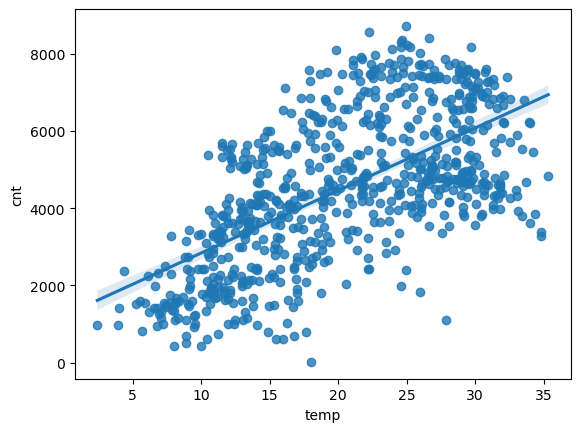

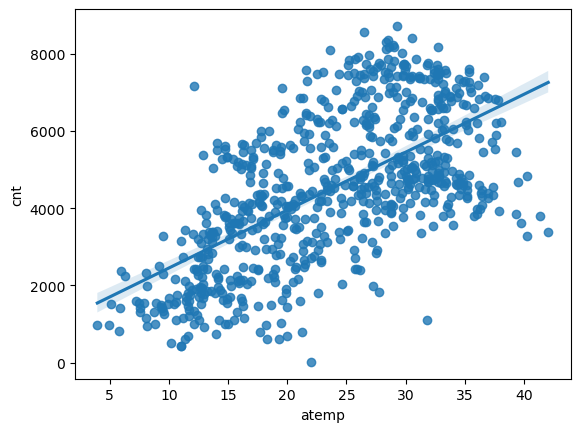

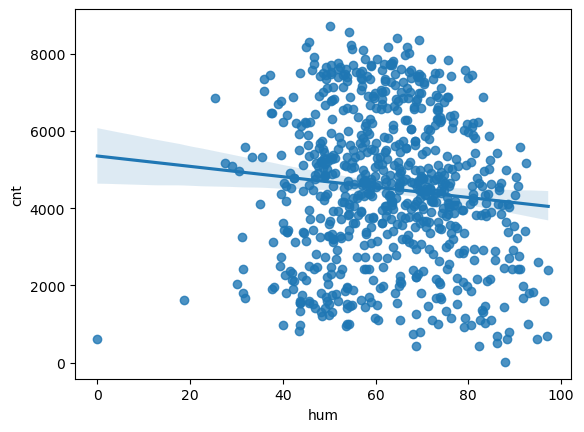

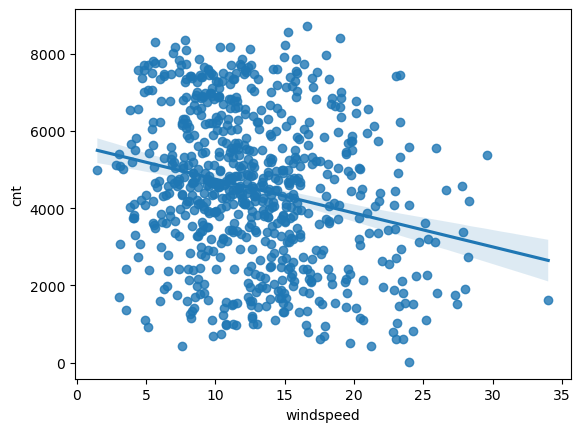

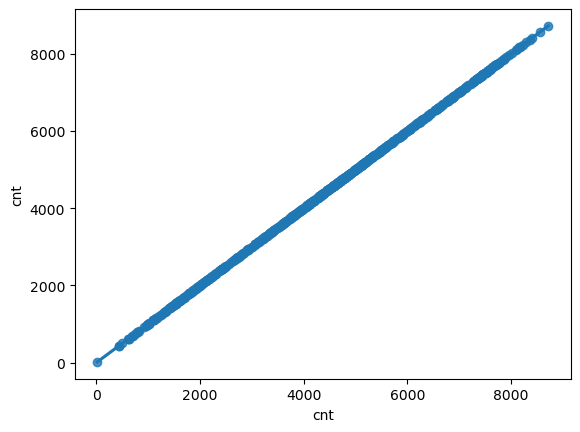

In [10]:
#visualizing the numerical dara:
for i in num_variables:
    sns.regplot(x=i,y='cnt',data=data)
    plt.show()

# Categorical Variables:

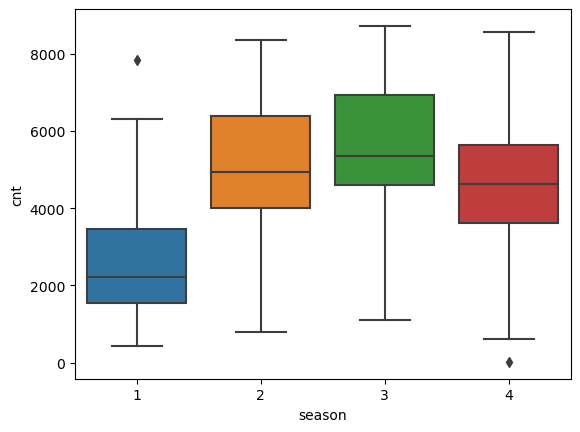

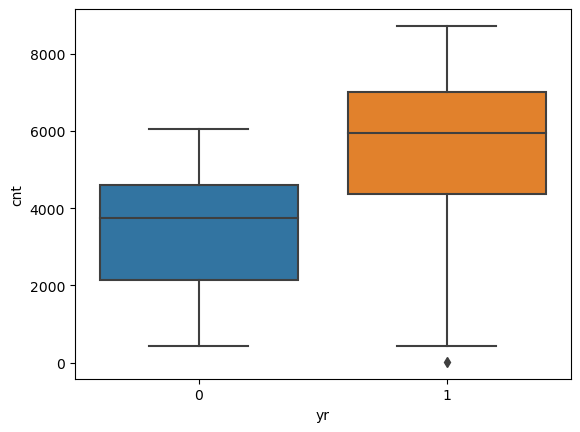

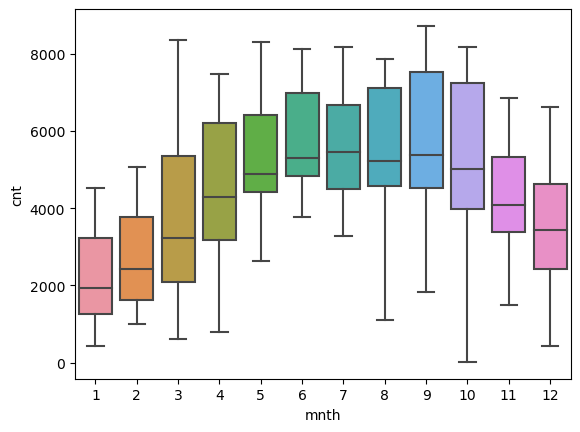

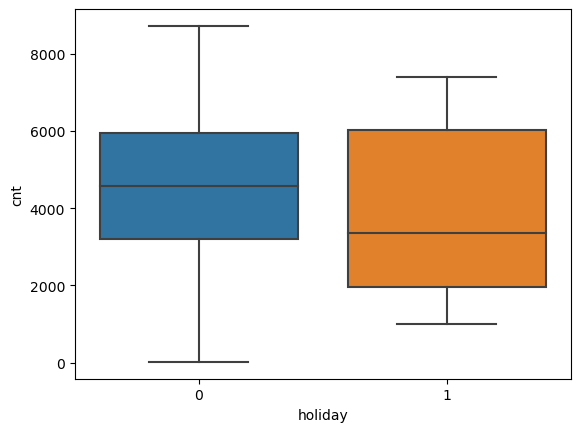

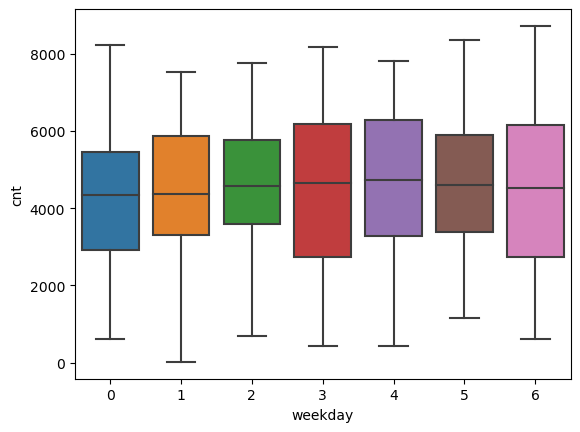

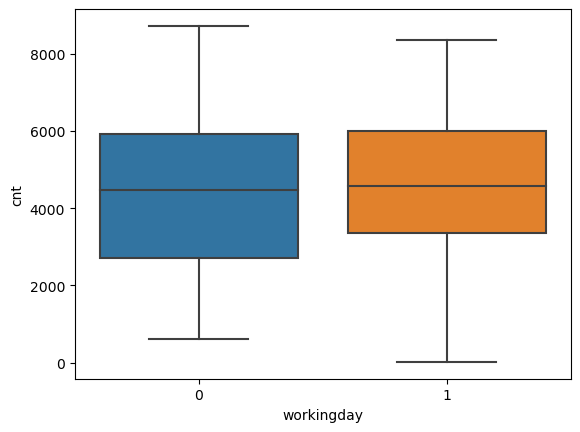

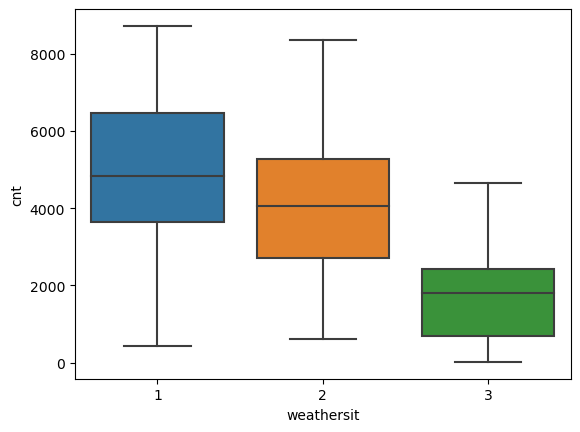

In [11]:
#checking the boxplot of target variable with the categorical variables:
for i in cat_variables:
    sns.boxplot(x=i,y='cnt',data=data)
    plt.show()

# Bivariate Analysis:

<Axes: >

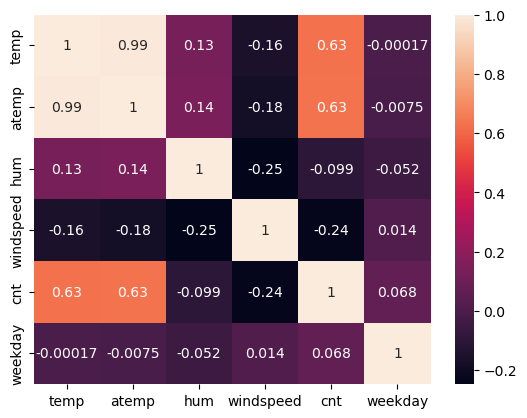

In [12]:
#Checking the heatmap of correlation between different numerical variables:

sns.heatmap(data[num_variables+['weekday']].corr(),annot=True)

In [13]:
#it is evident from heatmap that temp and atemp have very high correlation,hence we can drop one of them:
data=data.drop('temp',axis=1)

In [14]:
data.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [15]:
num_variables.remove('temp')

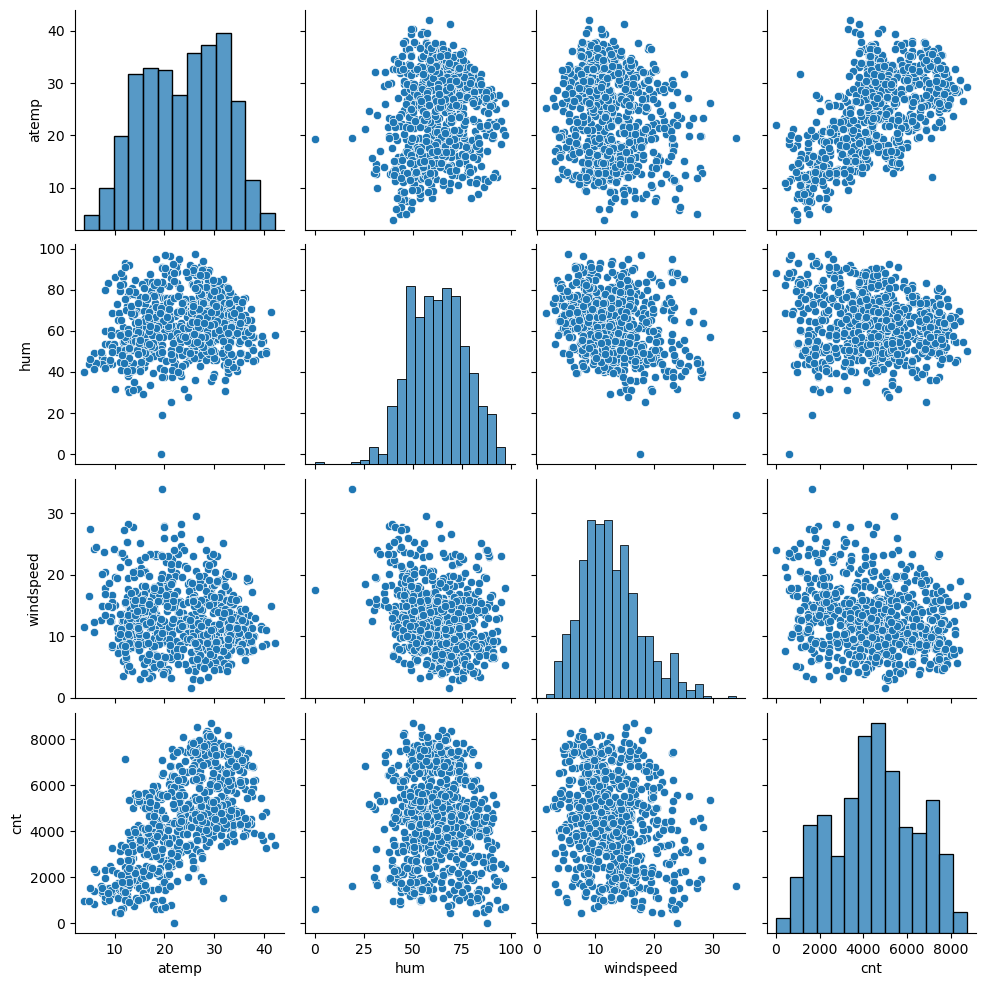

In [16]:
#Checking the pairplots for overall relation between different variables:
sns.pairplot(data[num_variables])
plt.show()

In [17]:
#Mapping the different numeric values to their actual variable names as per data dictionary:

data['season']=data['season'].map({1:'spring',2:'summer', 3:'fall', 4:'winter'})

data['weathersit']=data['weathersit'].map({1: 'Clear',2: 'Mist',3:'Light Rain',4: 'Heavy Rain'})

data['mnth']=data['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'sep'
                              ,10:'Oct',11:'Nov',12:'Dec'})

data['weekday']=data['weekday'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'})

In [18]:
data['weathersit'].unique()

array(['Mist', 'Clear', 'Light Rain'], dtype=object)

In [19]:
data['weekday'].unique()

array(['Sun', 'Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat'], dtype=object)

In [20]:
#creating list of columns for whom dummy variables are required:

dummy=['season','weathersit','mnth','weekday']

In [21]:
#creating dummy variables for all categorical variables:

for i in dummy:
    dummy1=pd.get_dummies(data[i],drop_first=True,dtype=float)
    data=pd.concat([data,dummy1],axis=1)
    data=data.drop(i,axis=1)

In [22]:
# Channging the name of column for better understanding:\

data['year_of_operation']=data['yr']

In [23]:
data=data.drop('yr',axis=1)

In [24]:
data.head()

,dteday,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Nov,Oct,sep,Mon,Sat,Sun,Thurs,Tue,Wed,year_of_operation
instant,,,,,,,,,,,,,,,,,,,,,
1,01-01-2018,0,0,18.18125,80.5833,10.749882,985,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,02-01-2018,0,0,17.68695,69.6087,16.652113,801,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,03-01-2018,0,1,9.47025,43.7273,16.636703,1349,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,04-01-2018,0,1,10.60610,59.0435,10.739832,1562,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
5,05-01-2018,0,1,11.46350,43.6957,12.522300,1600,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [25]:
#dropping the unwanted columns as they dont help in finding any insights:

data=data.drop('dteday',axis=1)


In [26]:
data.columns

Index(['holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt', 'spring',
       'summer', 'winter', 'Light Rain', 'Mist', 'Aug', 'Dec', 'Feb', 'Jan',
       'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'sep', 'Mon', 'Sat', 'Sun',
       'Thurs', 'Tue', 'Wed', 'year_of_operation'],
      dtype='object')

In [27]:
#adding the newly created variable to numerical variables:
num_variables.append('year_of_operation')

num_variables

['atemp', 'hum', 'windspeed', 'cnt', 'year_of_operation']

# Model Building:

In [28]:
#Splitting the data into test and train data:

df_train,df_test=train_test_split(data,train_size=0.7,random_state=100)

# removing 'cnt' from list of numerical variables:
num_variables.remove('cnt')

In [29]:
#creating the predictor variable and target variable dataframe of training data:
y_train=df_train.pop('cnt')
X_train=df_train

In [30]:
#Scaling the data for efficient convergence of model as well predicting the significance of variables:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[num_variables]=scaler.fit_transform(X_train[num_variables])
X_train

,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Light Rain,Mist,...,Nov,Oct,sep,Mon,Sat,Sun,Thurs,Tue,Wed,year_of_operation
instant,,,,,,,,,,,,,,,,,,,,,
577,0,1,0.766351,0.725633,0.264686,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
427,0,0,0.438975,0.640189,0.255342,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
729,0,0,0.200348,0.498067,0.663106,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
483,0,0,0.391735,0.504508,0.188475,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
112,0,1,0.318819,0.751824,0.380981,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,0,1,0.824359,0.679690,0.187140,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
54,0,1,0.218747,0.435939,0.111379,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
351,0,0,0.223544,0.577930,0.431816,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<Axes: >

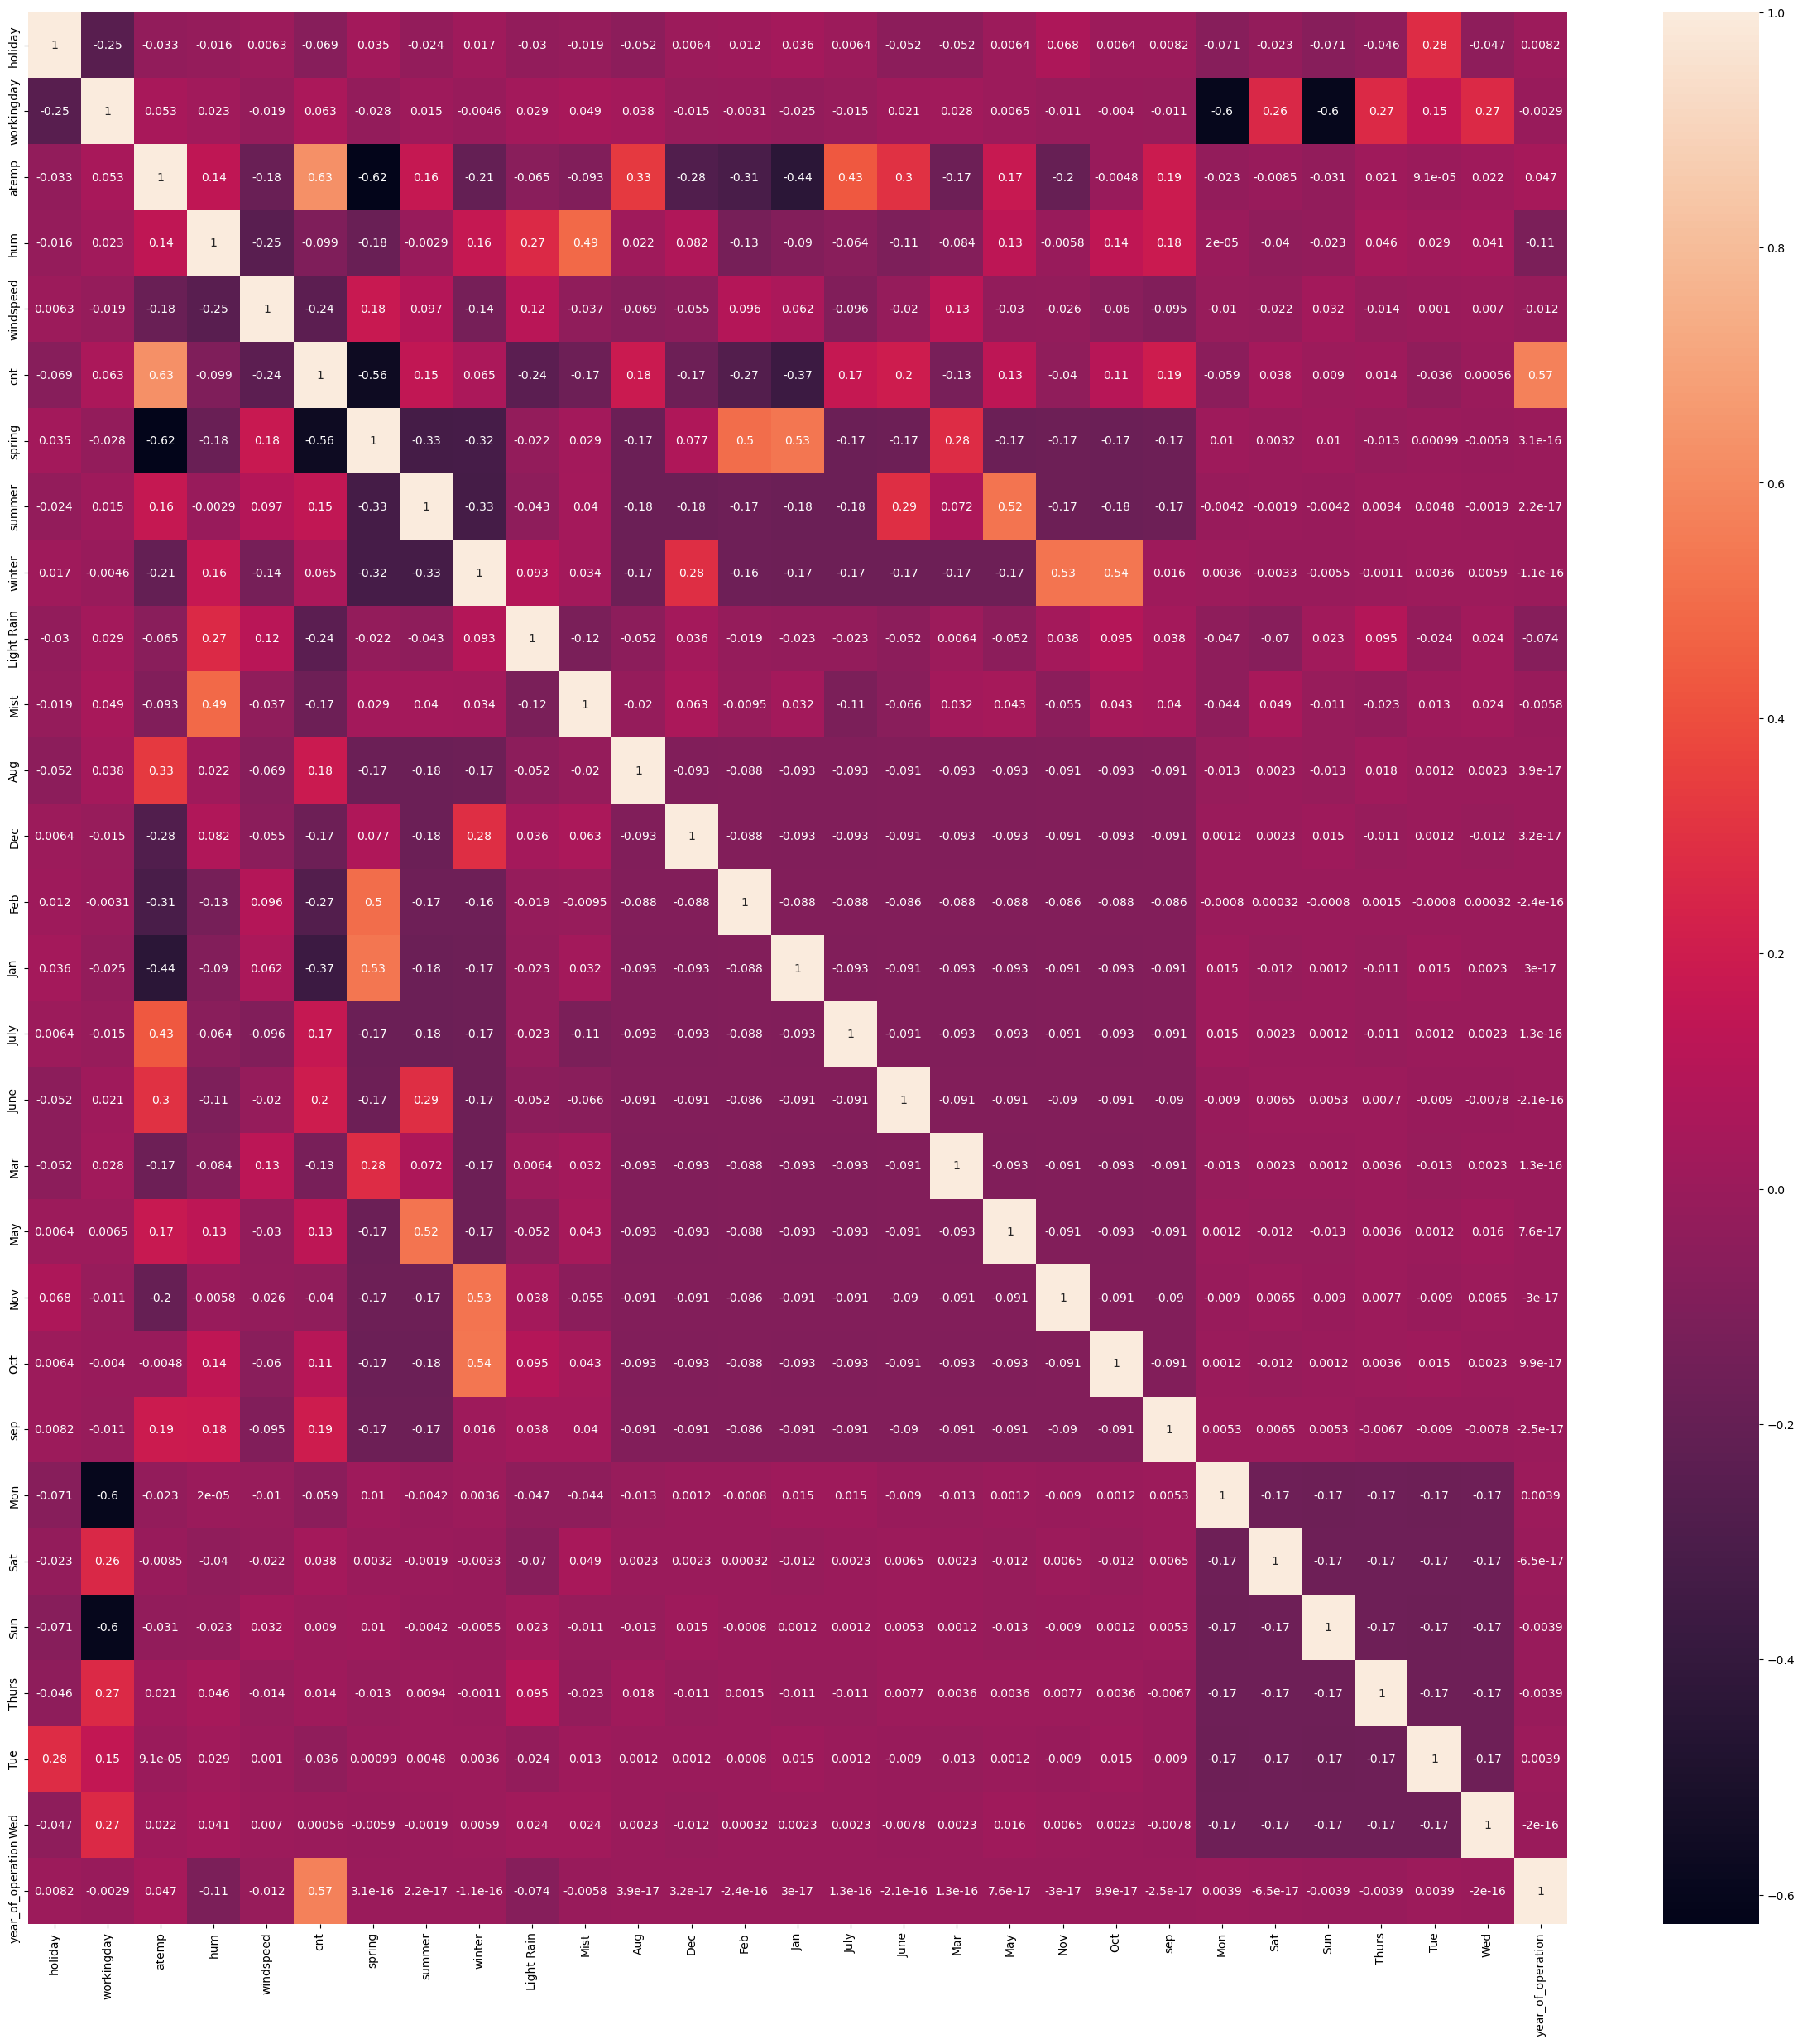

In [31]:
#Checking the heatmap to select important variables to decide on the model:

plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot=True)

# Based on heatmap deciding on variables of interest:

In [32]:
col_interest=['atemp','year_of_operation','sep','oct','windspeed','Light Rain']

# Manual Models:

# Model 1:

In [34]:
# Taking 'atemp' as a variable and checking on the model summary:

model=X_train['atemp']
model_sm=sm.add_constant(model)
lr1=sm.OLS(y_train,model_sm)
lr_model=lr1.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     367.6
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           4.77e-62
Time:                        16:20:22   Log-Likelihood:                -4448.0
No. Observations:                 510   AIC:                             8900.
Df Residuals:                     508   BIC:                             8909.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1431.8488    172.338      8.308      0.000    1093.265    1770.433
atemp       5950.4044    310.351     19.173      0.000    5340.674    6560.135
==============================================================================
Omnibus:                        3.256   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                2.759
Skew:                           0.081   Prob(JB):                        0.252
Kurtosis:                       2.678   Cond. No.                         6.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 2:


In [35]:
# Adding 'year_of_operation to check its affect on adjusted R^2:

model=X_train[['atemp','year_of_operation']]
model_sm=sm.add_constant(model)
lr1=sm.OLS(y_train,model_sm)
lr_model=lr1.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     582.7
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          3.98e-132
Time:                        16:21:08   Log-Likelihood:                -4282.5
No. Observations:                 510   AIC:                             8571.
Df Residuals:                     507   BIC:                             8584.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               645.9757    129.934      4.972      0.000     390.701     901.251
atemp              5440.2086    225.808     24.092      0.000    4996.574    5883.843
year_of_operation  2063.0058     95.845     21.524      0.000    1874.703    2251.309
==============================================================================
Omnibus:                       38.998   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.230
Skew:                          -0.546   Prob(JB):                     8.34e-14
Kurtosis:                       4.281   Cond. No.                         6.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature']=model.columns
vif['vif']=[variance_inflation_factor(model.values,i) for i in range(model.shape[1])]
vif['vif']=round(vif['vif'],2)
vif.sort_values(by='vif',ascending=False)

,Feature,vif
0,atemp,1.89
1,year_of_operation,1.89


# Model 3:


In [37]:
#Adding 'sep' and 'windspeed' :

model=X_train[['atemp','year_of_operation','sep','windspeed']]
model_sm=sm.add_constant(model)
lr1=sm.OLS(y_train,model_sm)
lr_model=lr1.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     321.8
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.30e-137
Time:                        16:21:55   Log-Likelihood:                -4263.9
No. Observations:                 510   AIC:                             8538.
Df Residuals:                     505   BIC:                             8559.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1258.8905    168.827      7.457      0.000     927.201    1590.580
atemp              5052.3006    227.395     22.218      0.000    4605.544    5499.057
year_of_operation  2079.3550     92.626     22.449      0.000    1897.375    2261.335
sep                 513.6082    173.607      2.958      0.003     172.527     854.689
windspeed         -1444.2952    278.847     -5.180      0.000   -1992.139    -896.452
==============================================================================
Omnibus:                       34.163   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.310
Skew:                          -0.530   Prob(JB):                     5.33e-11
Kurtosis:                       4.050   Cond. No.                         9.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature']=model.columns
vif['vif']=[variance_inflation_factor(model.values,i) for i in range(model.shape[1])]
vif['vif']=round(vif['vif'],2)
vif.sort_values(by='vif',ascending=False)

,Feature,vif
0,atemp,3.30
3,windspeed,2.69
1,year_of_operation,1.98
2,sep,1.14


# Model 4:


In [39]:
#Adding 'Light Rain' and 'Oct':

model=X_train[['atemp','year_of_operation','sep','windspeed','Light Rain','Oct']]
model_sm=sm.add_constant(model)
lr1=sm.OLS(y_train,model_sm)
lr_model=lr1.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     259.1
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.47e-150
Time:                        16:22:30   Log-Likelihood:                -4227.6
No. Observations:                 510   AIC:                             8469.
Df Residuals:                     503   BIC:                             8499.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1224.1016    158.455      7.725      0.000     912.786    1535.417
atemp              4991.0250    212.335     23.505      0.000    4573.852    5408.198
year_of_operation  2049.8124     86.602     23.669      0.000    1879.666    2219.959
sep                 652.2422    163.078      4.000      0.000     331.845     972.640
windspeed         -1230.6323    261.393     -4.708      0.000   -1744.189    -717.075
Light Rain        -2087.4839    259.522     -8.044      0.000   -2597.364   -1577.604
Oct                 746.3379    157.460      4.740      0.000     436.977    1055.699
==============================================================================
Omnibus:                       31.489   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.353
Skew:                          -0.518   Prob(JB):                     1.05e-09
Kurtosis:                       3.934   Cond. No.                         9.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature']=model.columns
vif['vif']=[variance_inflation_factor(model.values,i) for i in range(model.shape[1])]
vif['vif']=round(vif['vif'],2)
vif.sort_values(by='vif',ascending=False)

,Feature,vif
0,atemp,3.36
3,windspeed,2.74
1,year_of_operation,1.98
2,sep,1.16
5,Oct,1.12
4,Light Rain,1.07


# Model 5: Adding 'summer' and 'mist':

In [41]:
model=X_train[['atemp','year_of_operation','sep','windspeed','Light Rain','Oct','summer','Mist']]
model_sm=sm.add_constant(model)
lr1=sm.OLS(y_train,model_sm)
lr_model=lr1.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     237.3
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          5.27e-165
Time:                        16:23:03   Log-Likelihood:                -4187.5
No. Observations:                 510   AIC:                             8393.
Df Residuals:                     501   BIC:                             8431.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1568.8358    152.897     10.261      0.000    1268.438    1869.234
atemp              4595.8112    202.420     22.704      0.000    4198.114    4993.508
year_of_operation  2049.2030     80.205     25.550      0.000    1891.624    2206.782
sep                 917.8621    155.168      5.915      0.000     613.001    1222.723
windspeed         -1465.4114    244.326     -5.998      0.000   -1945.441    -985.381
Light Rain        -2332.0702    242.600     -9.613      0.000   -2808.709   -1855.431
Oct                 954.0778    148.842      6.410      0.000     661.645    1246.510
summer              540.0031     98.177      5.500      0.000     347.113     732.893
Mist               -670.4456     85.334     -7.857      0.000    -838.103    -502.788
==============================================================================
Omnibus:                       32.664   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.372
Skew:                          -0.466   Prob(JB):                     6.99e-12
Kurtosis:                       4.245   Cond. No.                         9.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature']=model.columns
vif['vif']=[variance_inflation_factor(model.values,i) for i in range(model.shape[1])]
vif['vif']=round(vif['vif'],2)
vif.sort_values(by='vif',ascending=False)

,Feature,vif
0,atemp,3.72
3,windspeed,2.92
1,year_of_operation,1.99
6,summer,1.50
7,Mist,1.46
2,sep,1.22
5,Oct,1.17
4,Light Rain,1.09


# Model 6: Adding 'holiday':


In [43]:
model=X_train[['atemp','year_of_operation','sep','windspeed','Light Rain','Oct','summer','Mist','holiday']]
model_sm=sm.add_constant(model)
lr1=sm.OLS(y_train,model_sm)
lr_model=lr1.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     215.2
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.05e-165
Time:                        16:23:38   Log-Likelihood:                -4183.0
No. Observations:                 510   AIC:                             8386.
Df Residuals:                     500   BIC:                             8428.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1614.6523    152.489     10.589      0.000    1315.054    1914.251
atemp              4551.8293    201.392     22.602      0.000    4156.150    4947.508
year_of_operation  2047.0035     79.586     25.721      0.000    1890.640    2203.367
sep                 943.1207    154.198      6.116      0.000     640.165    1246.076
windspeed         -1455.1014    242.455     -6.002      0.000   -1931.458    -978.745
Light Rain        -2362.9705    240.942     -9.807      0.000   -2836.353   -1889.588
Oct                 954.3252    147.688      6.462      0.000     664.160    1244.490
summer              527.8211     97.502      5.413      0.000     336.258     719.384
Mist               -683.2572     84.782     -8.059      0.000    -849.829    -516.685
holiday            -751.2665    252.313     -2.978      0.003   -1246.990    -255.543
==============================================================================
Omnibus:                       30.696   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.374
Skew:                          -0.434   Prob(JB):                     1.90e-11
Kurtosis:                       4.253   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature']=model.columns
vif['vif']=[variance_inflation_factor(model.values,i) for i in range(model.shape[1])]
vif['vif']=round(vif['vif'],2)
vif.sort_values(by='vif',ascending=False)

,Feature,vif
0,atemp,3.72
3,windspeed,2.95
1,year_of_operation,1.99
6,summer,1.51
7,Mist,1.46
2,sep,1.23
5,Oct,1.17
4,Light Rain,1.09
8,holiday,1.03


### Now that we have an idea of which all variables are important from the model perspective let us also dive into automated models and come to a final model selection.

# Automated Models:

# Model 7:

In [45]:
# spliting the train and test data:
df_train,df_test=train_test_split(data,train_size=0.7,random_state=100)

In [46]:
# Extracting the Y_train df:
y_train=df_train.pop('cnt')

In [47]:
# Extracting the X_train df:
X_train=df_train
# Scaling the trainning data for drawing inferences:
X_train[num_variables]=scaler.fit_transform(X_train[num_variables])

In [48]:
# Initializing the inbuilt Linear Regression model:
lr=LinearRegression()

#fitting the data
lr.fit(X_train,y_train)

# Initializing RFE:
rfe=RFE(lr,n_features_to_select=15)

# Fitting RFE to the trainning data:
rfe.fit(X_train,y_train)


RFE(estimator=LinearRegression(), n_features_to_select=15)

In [49]:
# Checking the list of selected variables:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 5),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light Rain', True, 1),
 ('Mist', True, 1),
 ('Aug', True, 1),
 ('Dec', False, 3),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', False, 9),
 ('June', False, 7),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', False, 4),
 ('Oct', False, 12),
 ('sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 11),
 ('Sun', True, 1),
 ('Thurs', False, 13),
 ('Tue', False, 8),
 ('Wed', False, 10),
 ('year_of_operation', True, 1)]

In [50]:
#slecting the columns as per RFE:
col=X_train.columns[rfe.support_]
X_train=X_train[col]

# adding constant :
X_train_rfe=sm.add_constant(X_train)

# Fitting the OLS model:
lr=sm.OLS(y_train,X_train_rfe)

lr=lr.fit()

#checking the summary:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.52e-188
Time:                        16:27:04   Log-Likelihood:                -4115.0
No. Observations:                 510   AIC:                             8260.
Df Residuals:                     495   BIC:                             8323.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1527.2599    200.647      7.612      0.000    1133.034    1921.485
holiday            -173.9748    183.300     -0.949      0.343    -534.117     186.167
workingday          668.5519     78.505      8.516      0.000     514.308     822.796
atemp              4640.6624    225.991     20.535      0.000    4196.643    5084.682
hum               -1421.5115    327.306     -4.343      0.000   -2064.591    -778.432
windspeed         -1489.2064    224.767     -6.626      0.000   -1930.821   -1047.591
summer              814.7302     98.113      8.304      0.000     621.961    1007.499
winter             1136.2462    100.607     11.294      0.000     938.577    1333.915
Light Rain        -2071.6473    229.556     -9.025      0.000   -2522.671   -1620.623
Mist               -494.7086     91.380     -5.414      0.000    -674.248    -315.169
Aug                 553.0263    140.248      3.943      0.000     277.472     828.581
Jan                -359.7475    152.253     -2.363      0.019    -658.890     -60.605
sep                1053.2504    140.786      7.481      0.000     776.638    1329.862
Mon                 288.8436    102.390      2.821      0.005      87.672     490.015
Sun                 743.8392     97.302      7.645      0.000     552.663     935.015
year_of_operation  2005.3709     70.525     28.435      0.000    1866.806    2143.936
==============================================================================
Omnibus:                       57.139   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.057
Skew:                          -0.560   Prob(JB):                     2.60e-33
Kurtosis:                       5.410   Cond. No.                     8.88e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.88e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [51]:
# Checking the VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif.sort_values(by='vif',ascending=False)

,Feature,vif
1,holiday,inf
2,workingday,inf
13,Mon,inf
14,Sun,inf
3,atemp,1.91
4,hum,1.89
9,Mist,1.57
7,winter,1.56
11,Jan,1.55
6,summer,1.49


# Few of the variables have perfect correlation with others as VIF is infinite , so it is wise to drop them and proceed in the next model.

# Model 8:

In [52]:
# Dropping the variables with high VIF score and low value of coefficients:
# Dropping 'holiday' and reevaluating:
X_train=X_train.drop(['holiday'],axis=1)

In [53]:
# adding constant :
X_train_rfe=sm.add_constant(X_train)

# Fitting the OLS model:
lr=sm.OLS(y_train,X_train_rfe)

lr=lr.fit()

#checking the summary:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.52e-188
Time:                        16:29:58   Log-Likelihood:                -4115.0
No. Observations:                 510   AIC:                             8260.
Df Residuals:                     495   BIC:                             8323.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1353.2851    325.286      4.160      0.000     714.174    1992.396
workingday          842.5267    223.589      3.768      0.000     403.225    1281.828
atemp              4640.6624    225.991     20.535      0.000    4196.643    5084.682
hum               -1421.5115    327.306     -4.343      0.000   -2064.591    -778.432
windspeed         -1489.2064    224.767     -6.626      0.000   -1930.821   -1047.591
summer              814.7302     98.113      8.304      0.000     621.961    1007.499
winter             1136.2462    100.607     11.294      0.000     938.577    1333.915
Light Rain        -2071.6473    229.556     -9.025      0.000   -2522.671   -1620.623
Mist               -494.7086     91.380     -5.414      0.000    -674.248    -315.169
Aug                 553.0263    140.248      3.943      0.000     277.472     828.581
Jan                -359.7475    152.253     -2.363      0.019    -658.890     -60.605
sep                1053.2504    140.786      7.481      0.000     776.638    1329.862
Mon                 462.8184    237.380      1.950      0.052      -3.579     929.215
Sun                 917.8140    236.251      3.885      0.000     453.635    1381.993
year_of_operation  2005.3709     70.525     28.435      0.000    1866.806    2143.936
==============================================================================
Omnibus:                       57.139   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.057
Skew:                          -0.560   Prob(JB):                     2.60e-33
Kurtosis:                       5.410   Cond. No.                         23.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# Checking the VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif.sort_values(by='vif',ascending=False)

,Feature,vif
0,const,87.77
1,workingday,9.08
13,Sun,6.06
12,Mon,5.73
2,atemp,1.91
3,hum,1.89
8,Mist,1.57
6,winter,1.56
10,Jan,1.55
5,summer,1.49


# Model 9:

In [55]:
# Similarly dropping 'Mon' as it has low co-efficient value and re-evaluating:
X_train=X_train.drop(['Mon'],axis=1)
X_train

,workingday,atemp,hum,windspeed,summer,winter,Light Rain,Mist,Aug,Jan,sep,Sun,year_of_operation
instant,,,,,,,,,,,,,
577,1,0.766351,0.725633,0.264686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
427,0,0.438975,0.640189,0.255342,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
729,0,0.200348,0.498067,0.663106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
483,0,0.391735,0.504508,0.188475,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
112,1,0.318819,0.751824,0.380981,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,1,0.824359,0.679690,0.187140,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
54,1,0.218747,0.435939,0.111379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
351,0,0.223544,0.577930,0.431816,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [56]:
# adding constant :
X_train_rfe=sm.add_constant(X_train)

# Fitting the OLS model:
lr=sm.OLS(y_train,X_train_rfe)

lr=lr.fit()

#checking the summary:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.8
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          6.87e-189
Time:                        16:30:45   Log-Likelihood:                -4116.9
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     496   BIC:                             8321.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1734.8343    260.566      6.658      0.000    1222.884    2246.784
workingday          448.3389     95.745      4.683      0.000     260.223     636.455
atemp              4656.1896    226.487     20.558      0.000    4211.197    5101.182
hum               -1412.5035    328.196     -4.304      0.000   -2057.329    -767.678
windspeed         -1495.1499    225.380     -6.634      0.000   -1937.967   -1052.332
summer              819.0312     98.365      8.326      0.000     625.768    1012.294
winter             1132.3165    100.870     11.225      0.000     934.131    1330.502
Light Rain        -2063.7748    230.168     -8.966      0.000   -2515.999   -1611.551
Mist               -492.0644     91.627     -5.370      0.000    -672.090    -312.039
Aug                 554.6120    140.641      3.943      0.000     278.287     830.937
Jan                -364.3190    152.665     -2.386      0.017    -664.268     -64.370
sep                1036.5852    140.923      7.356      0.000     759.706    1313.464
Sun                 524.6874    123.464      4.250      0.000     282.110     767.265
year_of_operation  2006.7192     70.721     28.375      0.000    1867.770    2145.668
==============================================================================
Omnibus:                       62.768   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.141
Skew:                          -0.600   Prob(JB):                     2.53e-38
Kurtosis:                       5.590   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Checking the VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif.sort_values(by='vif',ascending=False)

,Feature,vif
0,const,56.00
2,atemp,1.91
3,hum,1.89
1,workingday,1.65
12,Sun,1.65
8,Mist,1.57
6,winter,1.56
10,Jan,1.55
5,summer,1.48
9,Aug,1.42


In [58]:
# Similarly dropping 'Jan' as it has low co-efficient value and re-evaluating:

X_train=X_train.drop(['Jan',],axis=1)
# adding constant :
X_train_rfe=sm.add_constant(X_train)

# Fitting the OLS model:
lr=sm.OLS(y_train,X_train_rfe)

lr=lr.fit()

#checking the summary:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          7.65e-189
Time:                        16:31:09   Log-Likelihood:                -4119.8
No. Observations:                 510   AIC:                             8266.
Df Residuals:                     497   BIC:                             8321.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1559.3887    251.158      6.209      0.000    1065.927    2052.850
workingday          446.5546     96.193      4.642      0.000     257.559     635.551
atemp              4901.7009    202.724     24.179      0.000    4503.400    5300.002
hum               -1474.3782    328.712     -4.485      0.000   -2120.214    -828.542
windspeed         -1435.0341    225.023     -6.377      0.000   -1877.148    -992.920
summer              880.5233     95.377      9.232      0.000     693.132    1067.915
winter             1228.1669     92.965     13.211      0.000    1045.515    1410.819
Light Rain        -2030.0886    230.817     -8.795      0.000   -2483.586   -1576.591
Mist               -491.0169     92.058     -5.334      0.000    -671.888    -310.146
Aug                 579.4674    140.916      4.112      0.000     302.604     856.331
sep                1062.9751    141.150      7.531      0.000     785.651    1340.300
Sun                 520.0312    124.031      4.193      0.000     276.342     763.721
year_of_operation  1997.7905     70.954     28.156      0.000    1858.383    2137.198
==============================================================================
Omnibus:                       60.873   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.151
Skew:                          -0.573   Prob(JB):                     4.15e-38
Kurtosis:                       5.605   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# Checking the VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif.sort_values(by='vif',ascending=False)

,Feature,vif
0,const,51.54
3,hum,1.87
1,workingday,1.65
11,Sun,1.65
8,Mist,1.56
2,atemp,1.51
9,Aug,1.41
5,summer,1.38
6,winter,1.31
7,Light Rain,1.24


# Model 10:

In [60]:
# Similarly dropping 'workingday' as it has low co-efficient value and re-evaluating:

X_train=X_train.drop(['workingday',],axis=1)

# adding constant :
X_train_rfe=sm.add_constant(X_train)

# Fitting the OLS model:
lr=sm.OLS(y_train,X_train_rfe)

lr=lr.fit()

#checking the summary:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.6
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.82e-185
Time:                        16:31:39   Log-Likelihood:                -4130.7
No. Observations:                 510   AIC:                             8285.
Df Residuals:                     498   BIC:                             8336.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1950.9906    241.399      8.082      0.000    1476.704    2425.277
atemp              4928.6115    206.780     23.835      0.000    4522.343    5334.880
hum               -1565.9716    334.821     -4.677      0.000   -2223.807    -908.136
windspeed         -1467.1755    229.511     -6.393      0.000   -1918.104   -1016.247
summer              897.5132     97.253      9.229      0.000     706.436    1088.590
winter             1216.0614     94.826     12.824      0.000    1029.753    1402.370
Light Rain        -1941.9213    234.733     -8.273      0.000   -2403.109   -1480.733
Mist               -452.5162     93.556     -4.837      0.000    -636.330    -268.703
Aug                 609.3274    143.644      4.242      0.000     327.105     891.550
sep                1077.8771    143.996      7.485      0.000     794.963    1360.791
Sun                 161.8178     99.088      1.633      0.103     -32.865     356.501
year_of_operation  1999.5584     72.402     27.617      0.000    1857.307    2141.810
==============================================================================
Omnibus:                       66.888   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.969
Skew:                          -0.654   Prob(JB):                     3.73e-39
Kurtosis:                       5.572   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
# Checking the VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif.sort_values(by='vif',ascending=False)

,Feature,vif
0,const,45.73
2,hum,1.87
7,Mist,1.55
1,atemp,1.51
8,Aug,1.41
4,summer,1.38
5,winter,1.31
6,Light Rain,1.23
9,sep,1.20
3,windspeed,1.19


# Model 11:

In [62]:

# Similarly dropping 'Sun' as it has low co-efficient value and re-evaluating:

X_train=X_train.drop(['Sun',],axis=1)
# adding constant :
X_train_rfe=sm.add_constant(X_train)

# Fitting the OLS model:
lr=sm.OLS(y_train,X_train_rfe)

lr=lr.fit()

#checking the summary:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.1
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          4.24e-186
Time:                        16:32:30   Log-Likelihood:                -4132.0
No. Observations:                 510   AIC:                             8286.
Df Residuals:                     499   BIC:                             8333.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1992.3997    240.464      8.286      0.000    1519.952    2464.847
atemp              4921.8397    207.083     23.767      0.000    4514.977    5328.702
hum               -1593.8583    334.943     -4.759      0.000   -2251.931    -935.786
windspeed         -1456.3517    229.798     -6.338      0.000   -1907.842   -1004.862
summer              897.2008     97.415      9.210      0.000     705.806    1088.596
winter             1219.8319     94.956     12.846      0.000    1033.269    1406.395
Light Rain        -1929.3430    234.998     -8.210      0.000   -2391.050   -1467.636
Mist               -447.2098     93.656     -4.775      0.000    -631.218    -263.202
Aug                 615.8566    143.828      4.282      0.000     333.274     898.439
sep                1080.6249    144.226      7.493      0.000     797.259    1363.990
year_of_operation  1995.4127     72.479     27.531      0.000    1853.012    2137.814
==============================================================================
Omnibus:                       62.589   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.793
Skew:                          -0.596   Prob(JB):                     1.83e-38
Kurtosis:                       5.599   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# Checking the VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif.sort_values(by='vif',ascending=False)

,Feature,vif
0,const,45.22
2,hum,1.86
7,Mist,1.55
1,atemp,1.51
8,Aug,1.41
4,summer,1.38
5,winter,1.31
6,Light Rain,1.23
9,sep,1.20
3,windspeed,1.19


Now 10 variables or features seems like a model with reasonable complexity and hence selecting this as our final model and proceeding to model evaluation on the testing data.

Based on the co-efficient obtained from the model it is evident that the top three contributing features are as follows:

1. Apparent Temperature: Every unit rise of apparent temperature leads to an increase of approx. 4922 bike rentals counts.
2. Humidity: Every unit increase in humidity decreases count of bike rentals by 1594 approx.
3. Year of operation: As the year of operation increases there is an increase of approx. 1996 count of bike rentals.

# Model Evaluation:

In [64]:
#Preparing the testing data:

#Extracting y_test:
y_test=df_test.pop('cnt')
y_test

instant
185    6043
536    6211
300    2659
222    4780
153    4968
       ... 
703    6606
128    4333
641    7572
73     2046
654    7534
Name: cnt, Length: 220, dtype: int64

In [65]:
#Extracting X_test:
X_test=df_test
#Transforming the testing data before prediction:
X_test[num_variables]=scaler.transform(X_test[num_variables])
X_test

,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Light Rain,Mist,...,Nov,Oct,sep,Mon,Sat,Sun,Thurs,Tue,Wed,year_of_operation
instant,,,,,,,,,,,,,,,,,,,,,
185,1,0,0.769660,0.657364,0.084219,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
536,0,1,0.842587,0.610133,0.153728,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
300,0,1,0.496145,0.837699,0.334206,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
222,0,1,0.795343,0.437098,0.339570,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
153,0,1,0.741471,0.314298,0.537414,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,0,1,0.511907,0.756118,0.283397,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
128,0,0,0.577380,0.650923,0.069510,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
641,0,1,0.682653,0.817947,0.052115,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [66]:
# Selecting the columns as per RFE:
X_test=X_test[col]

#Dropping the columns as per the requiement of our final model with 10 features:
X_test=X_test.drop(['Mon','Sun','holiday','Jan','workingday'],axis=1)

In [67]:
# Adding constant:
X_test_sm=sm.add_constant(X_test)

In [68]:
X_test_sm

,const,atemp,hum,windspeed,summer,winter,Light Rain,Mist,Aug,sep,year_of_operation
instant,,,,,,,,,,,
185,1.0,0.769660,0.657364,0.084219,0.0,0.0,0.0,1.0,0.0,0.0,0.0
536,1.0,0.842587,0.610133,0.153728,1.0,0.0,0.0,0.0,0.0,0.0,1.0
300,1.0,0.496145,0.837699,0.334206,0.0,1.0,0.0,1.0,0.0,0.0,0.0
222,1.0,0.795343,0.437098,0.339570,0.0,0.0,0.0,0.0,1.0,0.0,0.0
153,1.0,0.741471,0.314298,0.537414,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
703,1.0,0.511907,0.756118,0.283397,0.0,1.0,0.0,0.0,0.0,0.0,1.0
128,1.0,0.577380,0.650923,0.069510,1.0,0.0,0.0,0.0,0.0,0.0,0.0
641,1.0,0.682653,0.817947,0.052115,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [69]:
# Getting the predcted values:
y_pred=lr.predict(X_test_sm)
y_pred

instant
185    4162.937036
536    7835.747321
300    3385.073972
222    5331.603203
153    5255.393388
          ...     
703    6109.297698
128    4592.661967
641    6740.755735
73     2514.002566
654    6319.047365
Length: 220, dtype: float64

In [70]:
# Defining errors or residuals:
res=y_test-y_pred
res

instant
185    1880.062964
536   -1624.747321
300    -726.073972
222    -551.603203
153    -287.393388
          ...     
703     496.702302
128    -259.661967
641     831.244265
73     -468.002566
654    1214.952635
Length: 220, dtype: float64

In [71]:
# Checking the r2 score of the testing data:
round(r2_score(y_true=y_test,y_pred=y_pred),2)

0.81

As can be seen from the r2 score, the predictions are quite close to the r2 value of the training data, which tells us that the projections are quite good.

## Checking validity of the assumptions of Linear Regression:

[]

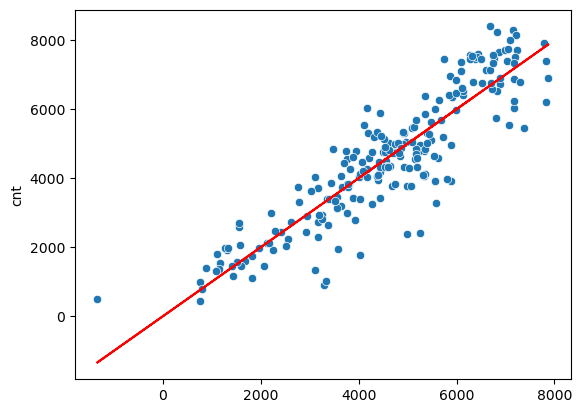

In [72]:
# Scatter plot of predicted values vs actual values: 
sns.scatterplot(x=y_pred,y=y_test)

#the red line gives the line through our prediction or the best fir line as per our model:
x,y=y_pred,y_pred

plt.plot(x,y,color='red')
plt.plot()

The red (predicted) line very well passes through the actual data

[]

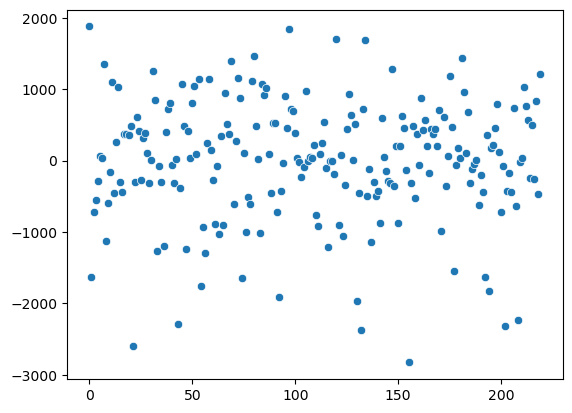

In [73]:
#checking the scatter plot of the residuals or errors:
sns.scatterplot(x=range(len(X_test)),y=res)
plt.plot()

### The errors are well spread over and there is no definite pattern that we can observe , suggesting the homoscedascity of the errors.

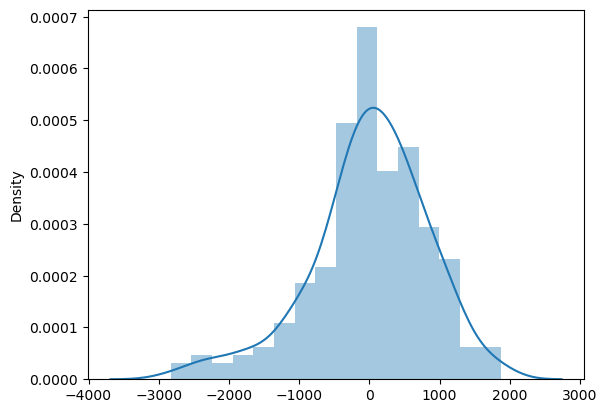

In [74]:
# Checking the distribution plot of the residuals or errors:
sns.distplot(res)
plt.show()

The errors follow almost a normal distribution with the mean at zero

All in all the data fits fairly well with linear regression and the fact that all the assumptions of linear regression stand valid and also the r2 score of 0.81 suggests that we have had a very good model.